# Convolutional Neural Networks
In this notebook, we will be building a CNN to classify **handwritten digits**. The training data for this activity is publicly available as the **MNIST database**. We will look at the different layers involved in the working of a CNN.

In [6]:
#importing relevant modules
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape) #loading the data from MNIST database and splitting into test and train datasets

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
#preparing the training data and normalizing it to [0,1]
x_train, x_test = x_train/255.0, x_test/255.0
shape=x_train[0].shape
print(shape)

(28, 28)


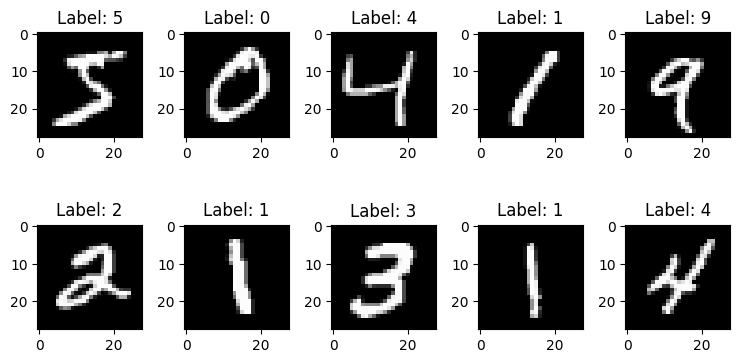

In [4]:
#display some images from the dataset
num_row = 2
num_col = 5

num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

## Layers of a CNN
### Convolutional Layer
CNN gets its name from the operation of **convolution**. Convolution is an operation where a **filter** moves across the pixels of the image and _convolves_ with it, wherein the overlapping pixel values are **multiplied** and then added together. These filters have _weights_ which are modified in the backpropagation phase and they gradually start picking out _local features_ such as **edges** and **lines**. 

<img title="Convolution" alt="Kernel" src="Images/filter.png" width="700" height="400">

### Pooling Layer
After performing the convolutional phase, we start reducing the size of the resultant convnet layer formed. We usually perform an operation called **max-pooling** wherein the largest value in a grid is taken. This basically _preserves_ the information about the local features detected using the convolutional layer while decreasing the space needed to store them. This convolution and max-pooling operation is usually performed multiple times. 

<img title="Max Pooling" alt="Downsizing" src="Images/maxpool.png" width="500" height="250">

### Dense Layer
After these operations, we finally flatten the resulting 2D matrix formed into a **fully connected neural network**, sometimes with multiple hidden layers. The final output layer has as _many nodes as the number of classes_ of images. For example, in our model, the output layer will have **10 nodes** as we want to classify the image as number from _0 to 9_. The expected output is a **one hot vector** which will output **1** for the correct answer node and **0** for all the other nodes.

<img title="An example model" alt="Digit Classification" src="Images/digit.png" width="800" height="500">


In [9]:
#define the convolutional layer 
model=tf.keras.Sequential(
    [
        layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax'),       
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,762 (1.23 MB)

 Trainable params: 322,762 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#training the model on the test dataset 
model.compile(optimizer='adam', loss = losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - accuracy: 0.6715 - loss: 1.2064
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 311ms/step - accuracy: 0.9552 - loss: 0.1535
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 315ms/step - accuracy: 0.9738 - loss: 0.0856
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 309ms/step - accuracy: 0.9806 - loss: 0.0641
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - accuracy: 0.9860 - loss: 0.0490
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 311ms/step - accuracy: 0.9874 - loss: 0.0417
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - accuracy: 0.9897 - loss: 0.0364
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 307ms/step - accuracy: 0.9915 - loss: 0.0286
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 301ms/step - accuracy: 0.9912 - loss: 0.0281
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 300ms/step - accuracy: 0.9937 - loss: 0.0216


In [12]:
#testing the final accuracy
score = model.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', round(score[1]*100,2),"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9876 - loss: 0.0352
loss= 0.029191182926297188
accuracy= 99.03 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


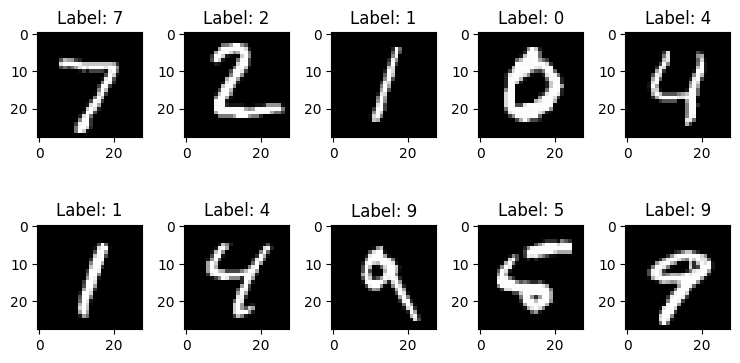

In [13]:
#looking at some of the predictions
images = x_test[:num]
predictions = np.argmax(model.predict(images),axis=1) #picking up the value in each row with highest probability

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(predictions[i]))
plt.tight_layout()
plt.show()
